<a href="https://colab.research.google.com/github/Kamilya2020/regression_2022/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas
data= pandas.read_csv("./sample_data/maisons.csv")

In [ ]:
data.drop(columns=["date"],inplace=True)

In [ ]:
def binariser(donnee,colnom):
  moy=donnee[colnom].mean()
  donnee[colnom] = (donnee[colnom]>moy).astype(float)

In [ ]:
binariser(data, 'latitude')
binariser(data,'longitude')
data.head(10) #data.head()

,age,metro,epicerie,latitude,longitude,prix
0,32.0,84.87882,10,1.0,1.0,37.9
1,19.5,306.59470,9,1.0,1.0,42.2
2,13.3,561.98450,5,1.0,1.0,47.3
3,13.3,561.98450,5,1.0,1.0,54.8
4,5.0,390.56840,5,1.0,1.0,43.1
5,7.1,2175.03000,3,0.0,0.0,32.1
6,34.5,623.47310,7,1.0,1.0,40.3
7,20.3,287.60250,6,1.0,1.0,46.7
8,31.7,5512.03800,1,0.0,0.0,18.8
9,17.9,1783.18000,3,0.0,0.0,22.1


In [ ]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)


In [ ]:
from sklearn.linear_model import LinearRegression
modele= LinearRegression().fit(x_train,y_train)

In [ ]:
print("Coefficient: ",modele.coef_)

Coefficient:  [-2.76279482e-01 -3.96140240e-03  1.20939252e+00  6.99957887e+00
  8.57378673e-01]


In [ ]:
y_pred=modele.predict(x_test)
#print(y_pred)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print("L'erreur quadratiqe moyenne: ",mean_squared_error(y_test,y_pred))
print("Score R2: " ,r2_score(y_test,y_pred)) #il faut que erreur s'approcche de 0 et score rapproche à 1


L'erreur quadratiqe moyenne:  36.104588115715906
Score R2:  0.7179504401364545


In [ ]:
age_m= LinearRegression().fit(x_train[["age"]],y_train)
y1_age=age_m.predict(x_test[["age"]])
print("L'erreur quadratiqe moyenne: ",mean_squared_error(y_test,y1_age))
print("Score R2: " ,r2_score(y_test,y1_age))

L'erreur quadratiqe moyenne:  127.36573768082242
Score R2:  0.005017031646050163


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10, include_bias=False)

age_train=poly.fit_transform(x_train[["age"]])
age_test=poly.fit_transform(x_test[["age"]])

In [ ]:
age_pm= LinearRegression().fit(age_train,y_train)
yp_age=age_pm.predict(age_test)

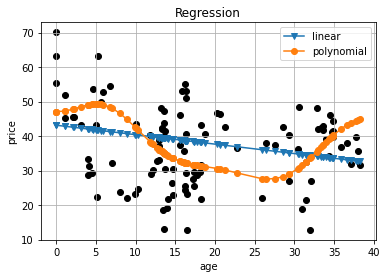

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_test["age"],y_test,color="black")
new_x,new_y=zip(*sorted(zip(x_test["age"],y1_age)))
plt.plot(new_x,new_y,"v-")
new_x,new_y=zip(*sorted(zip(x_test["age"],yp_age)))
plt.plot(new_x,new_y,"o-")

plt.legend([u"linear",u"polynomial"])
plt.xlabel("age")
plt.ylabel("price")
plt.title(u"Regression")
plt.grid()
plt.show()